In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

* k-최근접 이웃 회귀

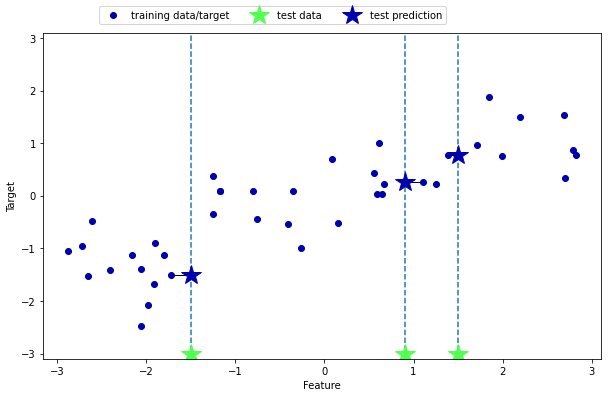

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

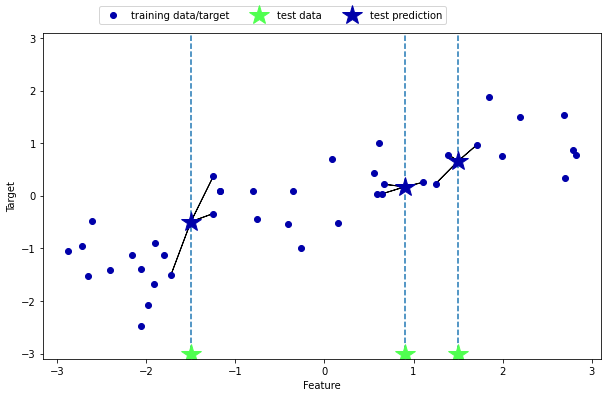

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [8]:
print('test prediction:\n', reg.predict(X_test))

test prediction:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [9]:
print('test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

test set R^2: 0.83


* KNeighborsRegressor 분석

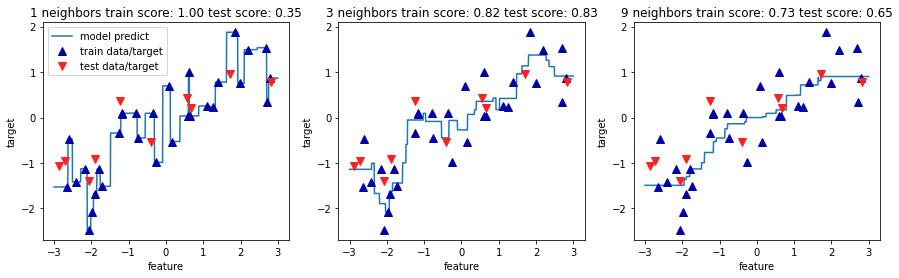

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        '{} neighbors train score: {:.2f} test score: {:.2f}'.format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(['model predict', 'train data/target', 'test data/target'], loc='best')

* KNeighbors 장단점과 매개변수
    * 데이터 포인트 사이의 거리를 재는 방법
        * 보통 유클리디안 거리 방식 이용
    * 이웃의 수
        * 보통 3~5 정도로 적을 때 잘동작동
    * 장점
        * 이해하기 매우 쉬운 모델
        * 많이 조정하지 않아도 자주 좋은 성능 발휘
        * 
    * 단점
        * 훈련 세트가 매우 크면 (특성의 수나 샘플의 수가 클 경우) 예측이 느려짐
        * 특성 값 대부분이 0인 (즉 희소한) 데이터셋과는 특히 잘 작동하지 않음.
    * 데이터 전쳐리하는 과정이 중요 
        * 이웃 간의 겨리 계산할 때 특성마다 값의 범위가 다르면 범위가 작은 특성에 크게 영향 받음.
        * 특성들이 같은 스케일을 갖도록 정규화하는 것이 일반적.


### 선형 모델

w[0]: 0.393906  b: -0.031804


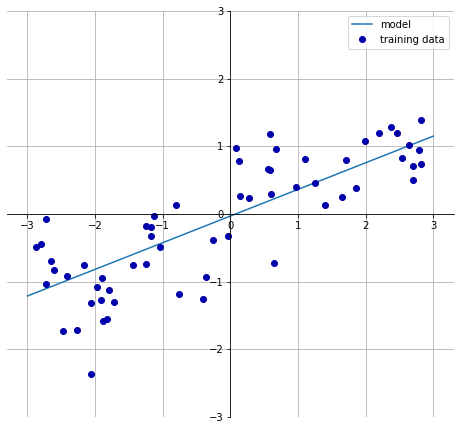

In [11]:
mglearn.plots.plot_linear_regression_wave()

* 선형 회귀 (최소제곱법)
    * 선형 회귀 (linear regression) / 최소제곱법 (OLS, ordinary least squares)
    * 평균제곱오차 (mean squared error) 최소화하는 파라미터 w, b

In [12]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [13]:
print('lr.coef_:', lr.coef_)
print('lr.intercept_:', lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


* coef_, intercept_ 
    * scikit-learn 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄을 붙임
    * 사용자가 지정한 매개변수와 구분하기 위해서

In [14]:
print('train set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lr.score(X_test, y_test)))

train set score: 0.67
test set score: 0.66


In [15]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [16]:
print('train set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lr.score(X_test, y_test)))

train set score: 0.95
test set score: 0.61


* 리지 회귀
    * 가중치 (w)
        * 가중치의 절댓값을 가능한 한 작게 만드는 것
    * 규제 (regularization)
        * 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
        * L2 규제

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('train set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

train set score: 0.89
test set score: 0.75


In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('train set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

train set score: 0.79
test set score: 0.64


* alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀림.
* 아주 작은 alpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐.

In [20]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('train set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

train set score: 0.93
test set score: 0.77


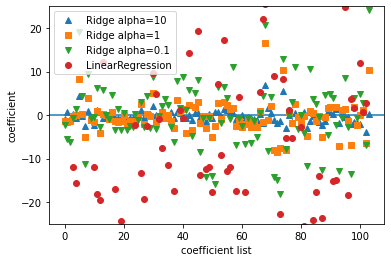

In [23]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('coefficient list')
plt.ylabel('coefficient')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

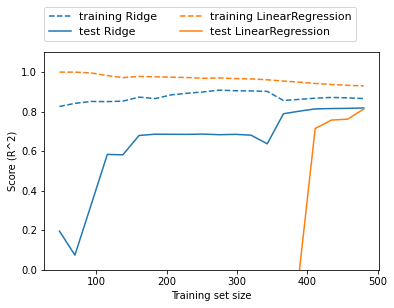

In [24]:
mglearn.plots.plot_ridge_n_samples()

* 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프래 학습 곡선 (learning curve)

* 라소
    * 선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있다.
    * 계수를 0에 가깝게 만들려고 한다.
    * 방식이 조금 다르고, L1 규제라고 한다.
    * L1 규제의 결과로 어떤 계수는 정말 0이 된다.

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('train set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('used feature numbers:', np.sum(lasso.coef_ != 0))

train set score: 0.29
test set score: 0.21
used feature numbers: 4


In [26]:
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 겸고가 발생
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print('train set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('used feature numbers:', np.sum(lasso001.coef_ != 0))

train set score: 0.90
test set score: 0.77
used feature numbers: 33


In [27]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print('train set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('used feature numbers:', np.sum(lasso00001.coef_ != 0))

train set score: 0.95
test set score: 0.64
used feature numbers: 96


Text(0, 0.5, 'coefficient')

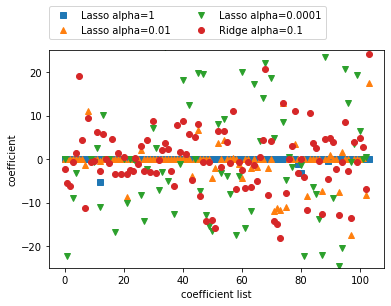

In [28]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('coefficient list')
plt.ylabel('coefficient')

* Ridge와 Lasso 중 보통은 리지 회귀를 선호.
* 특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋은 선택일 수 있다.
* 분석하기 쉬운 모델을 원한다면 Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어줄 것이다.
* ElasticNet: scikit-learn에서 제공하는 Lasso와 Ridge의 페널티를 결합한 모델.
    * 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야 한다.